In [1]:
#needed to make plots show up in-line
%matplotlib inline

In [2]:
#import the key numerical python library
import numpy as np

In [3]:
#import the plotting library for convenience
import matplotlib.pyplot as plt

OUTLINE:

1. vector basics: definition of vectors

2. vector functions: operations on vectors

3. vector norm: the size, length or magnitude of a vector

4. vector angles and dot product

5. correlations between vectors


## vectors: what & why?

Q: WHAT ARE VECTORS?

    vectors are sequences of numbers of a fixed length

    e.g. 
        x = [0.4, 2, 4, 3, 4.1]
        
    That's a "5-dimensional vector". 

Q: WHY ARE THEY CALLED "VECTORS"? (not like "disease vectors") 

    because the were orginally developed by people studying physics
    
    so like, position and velocity and acceleration were 3-vectors describing the path of an object in space

Q: WHY SHOULD WE STUDY VECTORS?

    because lots of things in science are fixed-length sequences, such as:
    
        - the responses of a single subject to a survey with K questions, each answer going from 1 to 10
        
        - the responses of a single neuron to a bunch of stimuli
        
      

## vector basics

In [52]:
#this is a very simple vector
x0 = np.array(12)

In [53]:
x0

array(12)

In [51]:
np.array?

In [5]:
#how many dimensions does it have?
x0.ndim

0

In [58]:
#the shape is empty because it's a actually a *scalar*
#Idea: a scalar is a 0-dimensional vector -- it's "just a number"
##Like the temperature in this room is a scalar
x0.shape

()

In [57]:
#ok now I'm putting brackets around the scalar
x1 = np.array([12])
x1

array([12])

In [14]:
#...  and now it's actually a vector, a sequence of numbers 
x1.ndim

1

In [15]:
#in this case, the sequence just has one element
x1.shape

(1,)

In [17]:
#but here it has 4 elements
x2 = np.array([0, 1, 2, 3])

In [18]:
x2

array([0, 1, 2, 3])

In [31]:
#still has only one "indexing direction"
x2.ndim

1

In [60]:
#by contrast this has two indexing directions
mat = np.array([[0, 1, 2], [2, 4, 6], [3, 6, 121]])
mat

array([[  0,   1,   2],
       [  2,   4,   6],
       [  3,   6, 121]])

In [61]:
mat.ndim

2

In [19]:
#we'll come back to this "rank two tensor" later.   
#Today we'll stick with "rank one" vectors. 
#but it's a vector in 4-dimensional "space"
x2.shape

(4,)

In [63]:
#here's a common construction in NumPy
x2 = np.arange(10)
x2

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [64]:
#we can multiply vectors by scalars and add scalars 
y2 = 3 * x2 + 2
y2

array([ 2,  5,  8, 11, 14, 17, 20, 23, 26, 29])

In [65]:
#you can add vectors to each other
x2 - y2

array([ -2,  -4,  -6,  -8, -10, -12, -14, -16, -18, -20])

In [68]:
#you can also multiply vectors by vectors

x2 = np.arange(8)
y2 = np.array([0, 1, -1, 0, 1, -1, 0, 1])

#this is called "pointwise" multiplication
x2 * y2

array([ 0,  1, -2,  0,  4, -5,  0,  7])

MATH FORMULA!

Let 

$$\vec{x} = [x_0, x_1, \ldots, x_{n-1}$$ 

and 

$$\vec{y} = [y_0, y_1, \ldots, y_{n-1}$$ 

be two $n$-dimensional vectors. 

The $\textit{pointwise product}$ of $\vec{x}$ and $\vec{y}$ is

$$\vec{x} * \vec{y} \equiv x_0 y_0 + x_1 y_1 + \ldots + x_{n-1} y_{n-1} = \sum_{i=0}^{n-1} x_i y_i$$

## vector functions

Two types of functions you'll often see are:

-- "scalar-valued" functions:

$$f: \mathbb{R}^{n} \longmapsto \mathbb{R}$$

These are like "statistical summaries."

-- "vector-valued" functions:

$$f: \mathbb{R}^{n} \longmapsto \mathbb{R}^k$$
$$\text{where $n$ might or might not equal $k$}$$

These are like "processes" to model. 


In [36]:
#here are some simple scalar-valued function:

def mean_func(x):
    return np.mean(x)

def var_func(x):
    return np.var(x)

##ok this is dumb notation ... 

In [39]:
vec = np.array([0, 1, 2, 3, 4, 5])
vec.mean()

2.5

In [40]:
vec.var()

2.9166666666666665

In [41]:
#ok here's a very simply "vector-valued" function

def square_func(x):
    return x**2

In [42]:
x2 = np.arange(4)
square_func(x2)

array([0, 1, 4, 9])

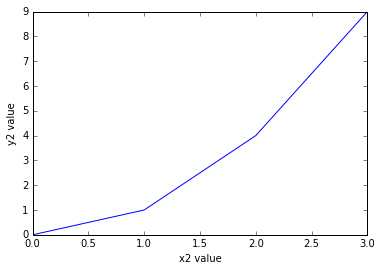

In [44]:
#it's very convenient to use vector functions to "make data"
plt.plot(x2,  square_func(x2))
plt.xlabel('x2 value')
plt.ylabel('y2 value')

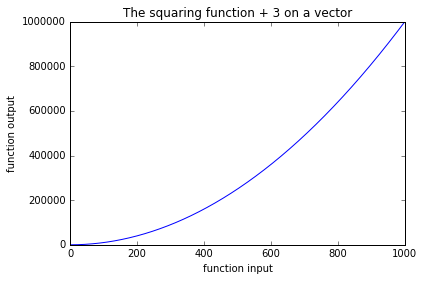

In [46]:
#here's a very slightly more complicated function over a large range

x2 = np.arange(1000)
def func(x):
    return x**2 + 3

plt.plot(x2, func(x2))
plt.xlabel('function input')
plt.ylabel('function output')
plt.title('The squaring function + 3 on a vector')

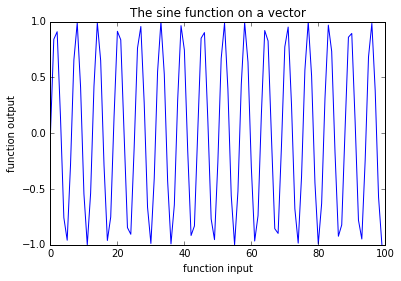

In [48]:
#most functions you're familiar with on single numbers just "work"
#in numpy as vector functions
#... like the sine function

x2 = np.arange(100)
plt.plot(x2, np.sin(x2))
plt.xlabel('function input')
plt.ylabel('function output')
plt.title('The sine function on a vector')

#BUT SEE: it's a little bumpy .... how to fix this? 

In [50]:
#our input is at too low a resolution.  how can we get finer spacing? 
np.arange?

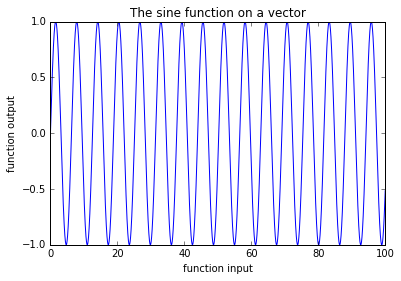

In [49]:
#ok so now let's look at sine at higher resolution
x2 = np.arange(0, 100, 0.01) #10000 datapoints

plt.plot(x2, np.sin(x2))
plt.xlabel('function input')
plt.ylabel('function output')
plt.title('The sine function on a vector')

#... smooth now! 

## vector norm

Intuitively, the "norm" of a vector is its magnitude -- the *distance* between 0 and the tip of the vector

In [69]:
def plot_vector2(v, **kwargs):
    """this is a simple plotting function for seeing vectors with arrowheads
    """
    plt.plot([0, v[0]], [0, v[1]])
    plt.scatter([0, v[0]], [0, v[1]])
    plt.arrow(0, 0, v[0], v[1], fc='k', length_includes_head=True, head_width=.1, **kwargs)
    plt.axis('equal')

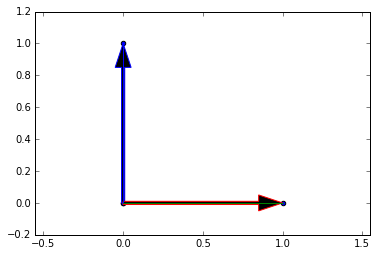

In [79]:
vec0 = [0, 1]
vec1 = [1, 0]
plot_vector2(vec0, edgecolor='blue', width=0.02)
plot_vector2(vec1, edgecolor='red', width=0.02)

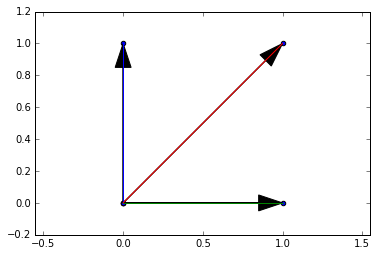

In [344]:
vec0 = np.array([0, 1])
vec1 = np.array([1, 0])
vec2 = vec0 + vec1
plot_vector2(vec0)
plot_vector2(vec1)
plot_vector2(vec2)

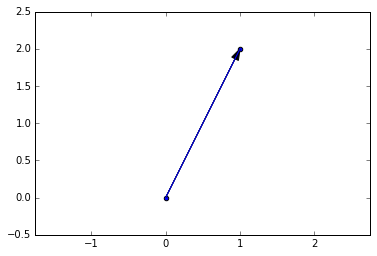

In [345]:
vec = [1, 2]
plot_vector2(vec)

In [346]:
vec[0]**2 + vec[1]**2

5

In [347]:
np.sqrt(vec[0]**2 + vec[1]**2)

2.23606797749979

DEFINITION

The norm (or "length" or "magnitude") of an $n$-dimensional vector:

$$\vec{v} = [v_0, v_1, \ldots v_{n-1}]$$

is defined as

$$||\vec{v}|| \equiv \sqrt{v_0^2 + v_1^2 + \ldots + v_{n-1}^2} = \sqrt{\sum_{i=0}^{n-1} v_i^2}$$

In [467]:
def vector_norm(vec):
    """this function computes the norm of a vector
    """
    
    #first we square the vector
    squared_vec = vec**2
    
    #then we take the sum over components
    sum_squared_vec = squared_vec.sum()
    
    #then we take the squareroot
    sqrt_sum_squared_vec = np.sqrt(sum_squared_vec)
    
    return sqrt_sum_squared_vec

In [469]:
vec = [1, 2]
vector_norm(vec)
#whoa ... why are we getting an error?

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

In [470]:
vec = np.array([1, 2])
vector_norm(vec)

2.23606797749979

In [348]:
np.linalg.norm?t

In [354]:
np.linalg.norm(vec)

2.23606797749979

## vector angles and dot product

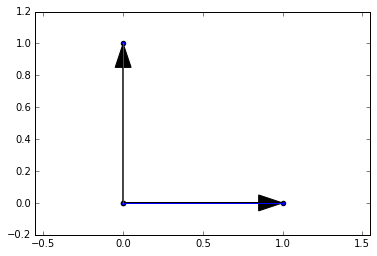

In [362]:
vec0 = np.array([1, 0])
vec1 = np.array([0, 1])

plot_vector2(vec0)
plot_vector2(vec1)

##What is the angle between the vectors??

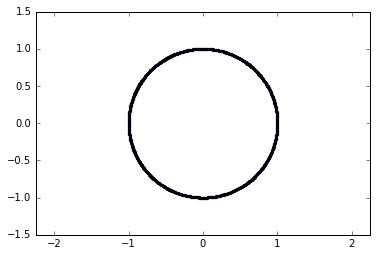

In [82]:
def plot_circle(**kwargs):
    """
    this function plots a circle of radius 1
    """
    theta = np.arange(0, 2 * np.pi, .01)
    r = 1
    x = r * np.sin(theta)
    y = r * np.cos(theta)
    kwargs.setdefault('s', 5)
    plt.scatter(x, y, **kwargs)
    plt.axis('equal')
    
plot_circle()

def circ_func(x):
    """
    this function returns the-y value on the circle of radius 1 
    for an input x 
    """
    return np.sqrt(1 - x**2)

def circ_vec(x):
    """
    this function creates a vector on the circle of radius 1
    for an input x
    """
    return np.array([x, circ_func(x)])

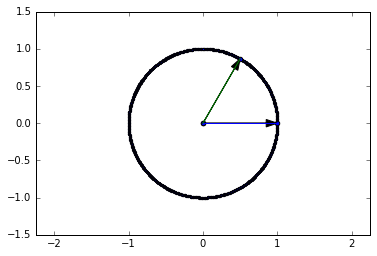

In [462]:
plot_circle()

vec0 = circ_vec(1)
plot_vector2(vec0)

xval = 0.5
vec1 = circ_vec(xval)
plot_vector2(vec1)

In [382]:
np.linalg.norm(vec0)

1.0

In [383]:
np.linalg.norm(vec1)

0.9999999999999999

In [385]:
##The circle of radius 1 IS the set of vectors of norm 1

In [386]:
##The circle of radius R IS the set of vectors of norm R

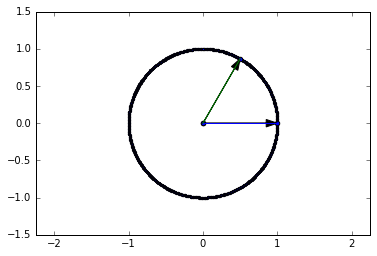

In [380]:
plot_circle()

vec0 = circ_vec(1)
plot_vector2(vec0)

xval = 0.5

vec1 = circ_vec(xval)
plot_vector2(vec1)

##What is the angle between the vectors???

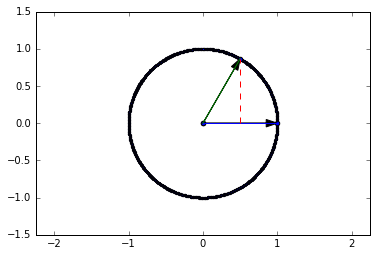

In [399]:
plot_circle()

vec0 = circ_vec(1)
plot_vector2(vec0)

xval = 0.5
vec1 = circ_vec(xval)
plot_vector2(vec1)

plt.plot([xval, xval], [0, circ_func(xval)], linestyle='--')



In [372]:
np.arccos(xval)

1.0471975511965979

In [375]:
np.arccos(xval) * 360 /  (2 * np.pi)

60.00000000000001

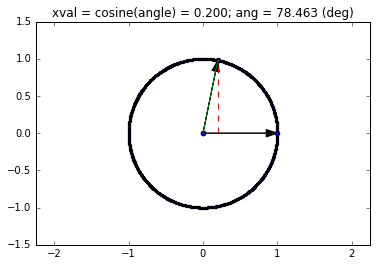

In [471]:
plot_circle()

vec0 = circ_vec(1)
plot_vector2(vec0)

xval = 0.2
vec1 = circ_vec(xval)
plot_vector2(vec1)

plt.plot([xval, xval], [0, circ_func(xval)], linestyle='--')

ang_deg = np.arccos(xval)*360/(2*np.pi)

plt.title('xval = cosine(angle) = %.3f; ang = %.3f(deg)' % (xval, ang_deg))

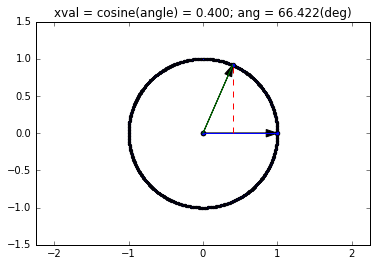

In [472]:
plot_circle()

vec0 = circ_vec(1)
plot_vector2(vec0)

xval = 0.4
vec1 = circ_vec(xval)
plot_vector2(vec1)

plt.plot([xval, xval], [0, circ_func(xval)], linestyle='--')

ang_deg = np.arccos(xval)*360/(2*np.pi)

plt.title('xval = cosine(angle) = %.3f; ang = %.3f(deg)' % (xval, ang_deg))

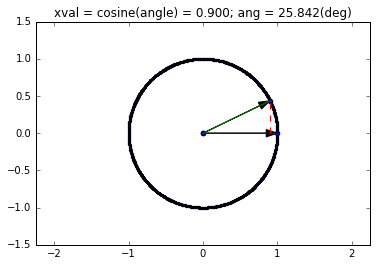

In [473]:
plot_circle()

vec0 = circ_vec(1)
plot_vector2(vec0)

xval = 0.9
vec1 = circ_vec(xval)
plot_vector2(vec1)

plt.plot([xval, xval], [0, circ_func(xval)], linestyle='--')

ang_deg = np.arccos(xval)*360/(2*np.pi)

plt.title('xval = cosine(angle) = %.3f; ang = %.3f(deg)' % (xval, ang_deg))

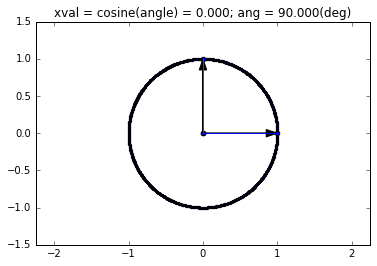

In [474]:
plot_circle()

vec0 = circ_vec(1)
plot_vector2(vec0)

xval = 0.0
vec1 = circ_vec(xval)
plot_vector2(vec1)

plt.plot([xval, xval], [0, circ_func(xval)], linestyle='--')

ang_deg = np.arccos(xval)*360/(2*np.pi)

plt.title('xval = cosine(angle) = %.3f; ang = %.3f(deg)' % (xval, ang_deg))

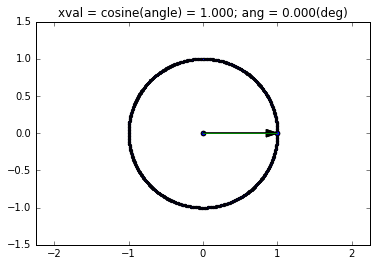

In [475]:
plot_circle()

vec0 = circ_vec(1)
plot_vector2(vec0)

xval = 1
vec1 = circ_vec(xval)
plot_vector2(vec1)

plt.plot([xval, xval], [0, circ_func(xval)], linestyle='--')

ang_deg = np.arccos(xval)*360/(2*np.pi)

plt.title('xval = cosine(angle) = %.3f; ang = %.3f(deg)' % (xval, ang_deg))

PRINCIPLE: the cosine of the angle between the vectors is kind of like a 
           SIMILARITY METRIC between the vectors

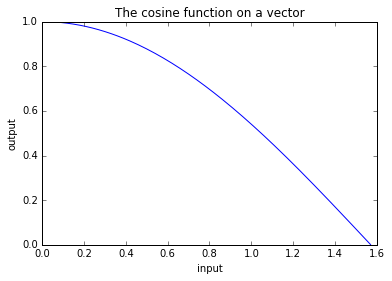

In [397]:
x = np.arange(0, np.pi / 2, 0.01)
plt.plot(x, np.cos(x))
plt.xlabel('input')
plt.ylabel('output')
plt.title('The cosine function on a vector')

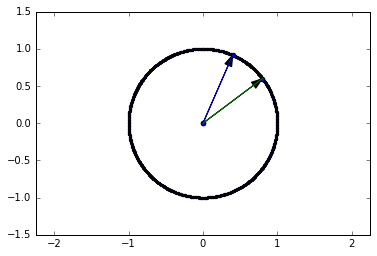

In [404]:
plot_circle()

vec0 = circ_vec(0.4)
plot_vector2(vec0)

vec1 = circ_vec(0.8)
plot_vector2(vec1)

## ok how do we do it in general? 

Board-work leading to the result that if we have 2-vectors 

$$\vec{v}_0 = [x_0, y_0]$$ 
and
$$\vec{v}_1 = [x_1, y_1]$$
    
then the cosine of the angle between them is:

$$\text{cos-ang} = x_0 y_0 + x_1 y_1$$



/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in arccos


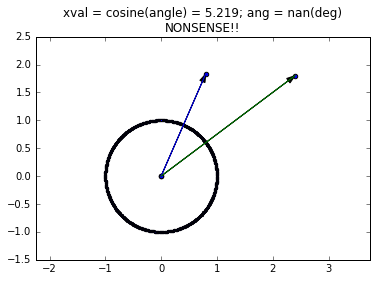

In [84]:
plot_circle()

vec0 = 2*circ_vec(0.4)
plot_vector2(vec0)

vec1 = 3 * circ_vec(0.8)
plot_vector2(vec1)

cos_ang = vec0[0] * vec1[0] + vec0[1] * vec1[1]

ang_deg = np.arccos(cos_ang)*360/(2*np.pi)

plt.title('xval = cosine(angle) = %.3f; ang = %.3f(deg)\nNONSENSE!!' % (cos_ang, ang_deg))

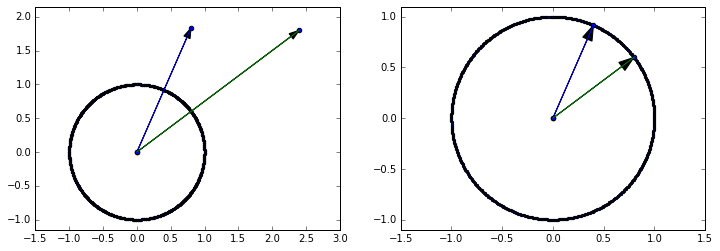

In [458]:
plt.figure(figsize = (12, 4))
plt.subplot(1, 2, 1)
plot_circle()

vec0 = 2*circ_vec(0.4)
plot_vector2(vec0)

vec1 = 3*circ_vec(0.8)
plot_vector2(vec1)

plt.subplot(1, 2, 2)
plot_circle()

vec0_norm = vec0 / np.linalg.norm(vec0)
vec1_norm = vec1 / np.linalg.norm(vec1)

plot_vector2(vec0_norm)
plot_vector2(vec1_norm)


In [86]:
def cos_ang_func_dim2(v0, v1):
    """
    this function computes the angle between two 2-vectors v0 and v1
    """
    
    #first we normalize the vectors
    v0n = v0 / np.linalg.norm(v0)
    v1n = v1 / np.linalg.norm(v1)
    
    #then we compute the multiplication formula
    cos_ang = v0n[0] * v1n[0] + v0n[1] * v1n[1]
    
    return cos_ang

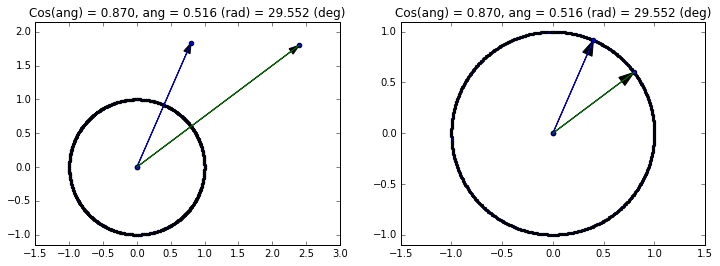

In [87]:
plt.figure(figsize = (12, 4))
plt.subplot(1, 2, 1)
plot_circle()

vec0 = 2*circ_vec(0.4)
plot_vector2(vec0)

vec1 = 3*circ_vec(0.8)
plot_vector2(vec1)

cos_ang = cos_ang_func_dim2(vec0, vec1)
ang = np.arccos(cos_ang)
ang_deg = 360 / (2 * np.pi) * ang
plt.title('Cos(ang) = %.3f, ang = %.3f (rad) = %.3f (deg)' % (cos_ang, ang, ang_deg))


plt.subplot(1, 2, 2)
plot_circle()

vec0_norm = vec0 / np.linalg.norm(vec0)
vec1_norm = vec1 / np.linalg.norm(vec1)

plot_vector2(vec0_norm)
plot_vector2(vec1_norm)
cos_ang = cos_ang_func_dim2(vec0_norm, vec1_norm)
ang = np.arccos(cos_ang)
ang_deg = 360 / (2 * np.pi) * ang
plt.title('Cos(ang) = %.3f, ang = %.3f (rad) = %.3f (deg)' % (cos_ang, ang, ang_deg))



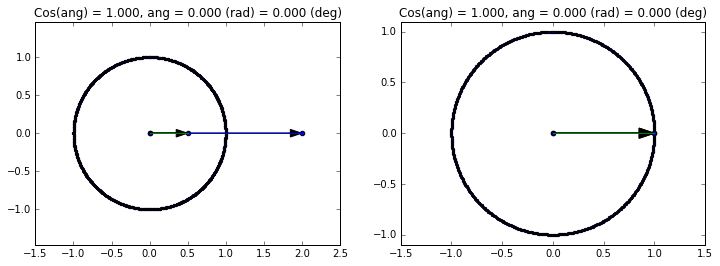

In [88]:
plt.figure(figsize = (12, 4))
plt.subplot(1, 2, 1)
plot_circle()

vec0 = 2*circ_vec(1)
plot_vector2(vec0)

vec1 = .5*circ_vec(1)
plot_vector2(vec1)

cos_ang = cos_ang_func_dim2(vec0, vec1)
ang = np.arccos(cos_ang)
ang_deg = 360 / (2 * np.pi) * ang
plt.title('Cos(ang) = %.3f, ang = %.3f (rad) = %.3f (deg)' % (cos_ang, ang, ang_deg))


plt.subplot(1, 2, 2)
plot_circle()

vec0_norm = vec0 / np.linalg.norm(vec0)
vec1_norm = vec1 / np.linalg.norm(vec1)

plot_vector2(vec0_norm)
plot_vector2(vec1_norm)
cos_ang = cos_ang_func_dim2(vec0_norm, vec1_norm)
ang = np.arccos(cos_ang)
ang_deg = 360 / (2 * np.pi) * ang
plt.title('Cos(ang) = %.3f, ang = %.3f (rad) = %.3f (deg)' % (cos_ang, ang, ang_deg))



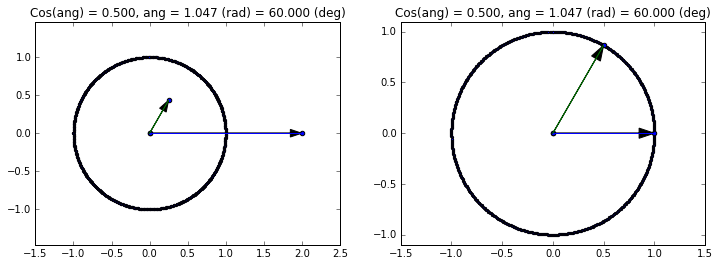

In [89]:
plt.figure(figsize = (12, 4))
plt.subplot(1, 2, 1)
plot_circle()

vec0 = 2*circ_vec(1)
plot_vector2(vec0)

vec1 = .5*circ_vec(.5)
plot_vector2(vec1)

cos_ang = cos_ang_func_dim2(vec0, vec1)
ang = np.arccos(cos_ang)
ang_deg = 360 / (2 * np.pi) * ang
plt.title('Cos(ang) = %.3f, ang = %.3f (rad) = %.3f (deg)' % (cos_ang, ang, ang_deg))


plt.subplot(1, 2, 2)
plot_circle()

vec0_norm = vec0 / np.linalg.norm(vec0)
vec1_norm = vec1 / np.linalg.norm(vec1)

plot_vector2(vec0_norm)
plot_vector2(vec1_norm)
cos_ang = cos_ang_func_dim2(vec0_norm, vec1_norm)
ang = np.arccos(cos_ang)
ang_deg = 360 / (2 * np.pi) * ang
plt.title('Cos(ang) = %.3f, ang = %.3f (rad) = %.3f (deg)' % (cos_ang, ang, ang_deg))



GENERAL PRINCIPLE:

Let's say we have two $n$-dimensional vectors:

$$\vec{x} = [x_0, x_1, \ldots, x_{n-1}]$$

$$\vec{y} = [y_0, y_1, \ldots, y_{n-1}]$$

The cosine of the angle between them is:

$$\text{cos of ang} = x_0 y_0 + x_1 y_1 + x_2 y_2 + \ldots = \sum_{i=0}^{n-1} x_i y_i = \vec{x} * \vec{y}$$


... as long as the vectors have norm = 1.  If not, we have to normalize:

$$\text{cos of ang} = \left( \frac{\vec{x}}{||\vec{x}||} \right) * \left( \frac{\vec{y}}{||\vec{y}||} \right)$$


In [447]:
def cos_ang_func(v0, v1):
    v0n = v0 / np.linalg.norm(v0)
    v1n = v1 / np.linalg.norm(v1)
    mult_vec = v0n * v1n
    sum_mul_vec = sum(v0n * v1n)
    return sum_mul_vec

In [448]:
vec0 = 2*circ_vec(1)
vec1 = .5 * circ_vec(1)

cos_ang = cos_ang_func(vec0, vec1)
print("cos(ang) = %.3f" % cosang)

ang = np.arccos(cos_ang)
ang_deg = 360 / (2 * np.pi) * ang

print("ang = arccos(%.3f) = %.3f (rad) = %.3f (deg)" % (cosang, ang, ang_deg))


cos(ang) = 0.500
ang = arccos(0.500) = 0.000 (rad) = 0.000 (deg)


In [450]:
vec0 = 2*circ_vec(0)
vec1 = .5 * circ_vec(1)

cos_ang = cos_ang_func(vec0, vec1)
print("cos(ang) = %.3f" % cosang)

ang = np.arccos(cos_ang)
ang_deg = 360 / (2 * np.pi) * ang

print("ang = arccos(%.3f) = %.3f (rad) = %.3f (deg)" % (cosang, ang, ang_deg))

cos(ang) = 0.500
ang = arccos(0.500) = 1.571 (rad) = 90.000 (deg)


In [451]:
vec0 = 2*circ_vec(0.5)
vec1 = .5 * circ_vec(1)

cos_ang = cos_ang_func(vec0, vec1)
print("cos(ang) = %.3f" % cosang)

ang = np.arccos(cos_ang)
ang_deg = 360 / (2 * np.pi) * ang

print("ang = arccos(%.3f) = %.3f (rad) = %.3f (deg)" % (cosang, ang, ang_deg))

cos(ang) = 0.500
ang = arccos(0.500) = 1.047 (rad) = 60.000 (deg)


DEFINITION: 

The formula 

$$x_0 y_0 + x_1 y_1 + x_2 y_2 + \ldots = \sum_{i=0}^{n-1} x_i y_i = \vec{x} * \vec{y}$$

is also known as the DOT-PRODUCT


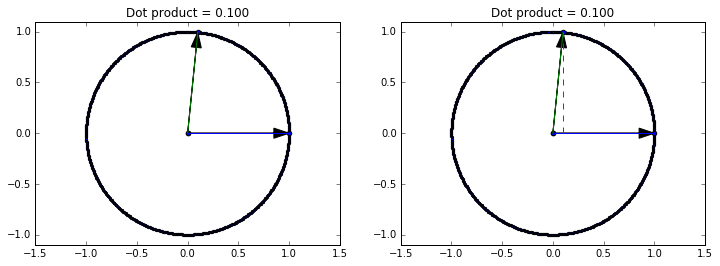

In [477]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)

plot_circle()

x = np.array([1, 0])
plot_vector2(x)

y = circ_vec(.1)
plot_vector2(y)

dotval = np.dot(x, y)
plt.title('Dot product = %.3f' % dotval)

plt.subplot(1, 2, 2)
plot_circle()

x = np.array([1, 0])
plot_vector2(x)

y = circ_vec(.1)
plot_vector2(y)

dotval = np.dot(x, y)
plt.title('Dot product = %.3f' % dotval)

plt.plot([dotval, dotval], [0, circ_func(dotval)], linestyle='--')


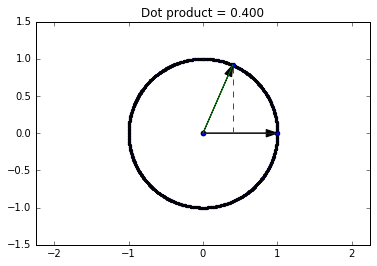

In [176]:
plot_circle()

x = np.array([1, 0])
plot_vector2(x)

y = circ_vec(.4)
plot_vector2(y)

dotval = np.dot(x, y)
plt.title('Dot product = %.3f' % dotval)

plt.plot([dotval, dotval], [0, circ_func(dotval)], linestyle='--')

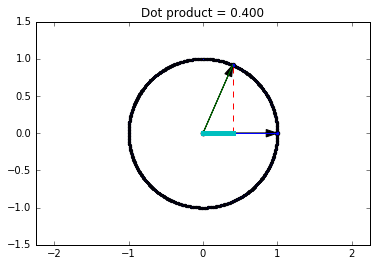

In [180]:
plot_circle()

x = np.array([1, 0])
plot_vector2(x)

y = circ_vec(.4)
plot_vector2(y)

dotval = np.dot(x, y)
plt.title('Dot product = %.3f' % dotval)

plt.plot([dotval, dotval], [0, circ_func(dotval)], linestyle='--')
plt.plot([0, dotval], [0, 0], linewidth=5)

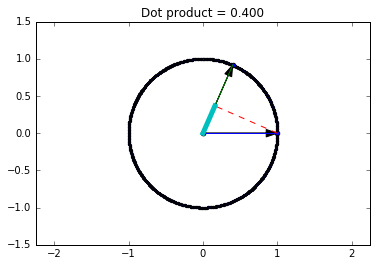

In [466]:
plot_circle()

x = np.array([1, 0])
plot_vector2(x)

y = circ_vec(.4)
plot_vector2(y)

dotval = np.dot(x, y)
plt.title('Dot product = %.3f' % dotval)

dx = dotval**2
dy = dotval * np.sqrt(1 - dotval**2)
plt.plot([x[0], dx], [x[1], dy], linestyle = '--')
plt.plot([0, dx], [0, dy], linewidth=5)

## Correlations, and an example

In [132]:
ls

'Matrix basics.ipynb'   neural_data.npy   Vectors.ipynb


In [133]:
data = np.load('neural_data.npy')

In [134]:
data.shape

(5760, 296)

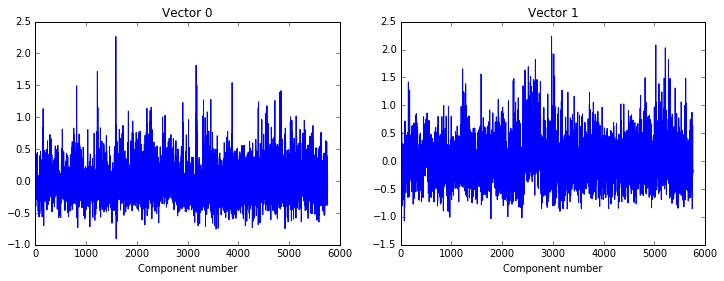

In [98]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(data[:, 0])
plt.title('Vector 0')
plt.xlabel('Component number')

plt.subplot(1, 2, 2)
plt.plot(data[:, 1])
plt.title('Vector 1')
plt.xlabel('Component number')

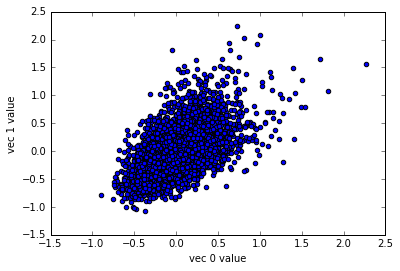

In [99]:
plt.scatter(data[:, 0], data[:, 1])
plt.xlabel('vec 0 value')
plt.ylabel('vec 1 value')

In [100]:
import scipy.stats as stats

In [101]:
stats.pearsonr(data[:, 0], data[:, 1])

(0.56918406, 0.0)

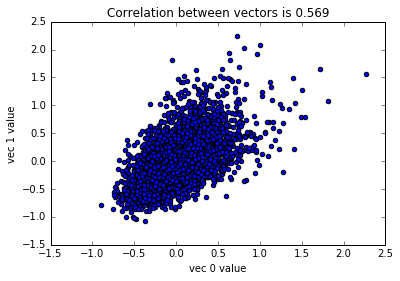

In [102]:
plt.scatter(data[:, 0], data[:, 1])
plt.xlabel('vec 0 value')
plt.ylabel('vec 1 value')
corrval = stats.pearsonr(data[:, 0], data[:, 1])[0]
plt.title('Correlation between vectors is %.3f' % corrval)

In [103]:
v0 = data[:, 0] - data[:, 0].mean()
v0 = v0 / v0.std()
v1 = data[:, 1] - data[:, 1].mean()
v1 = v1 / v1.std()

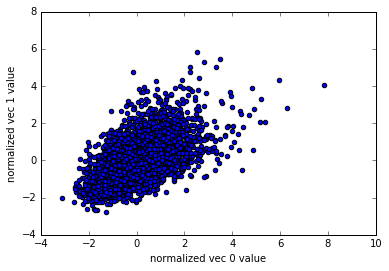

In [104]:
plt.scatter(v0, v1)
plt.xlabel('normalized vec 0 value')
plt.ylabel('normalized vec 1 value')


In [105]:
np.dot(v0, v1)

3278.5005

In [106]:
N = data[:, 0].shape[0]
N

5760

In [107]:
np.dot(v0, v1) / N

0.5691841125488282

In [108]:
def normalize(v):
    v = v - v.mean()
    v = v / v.std()
    return v

Our computed dot-product value is 0.569


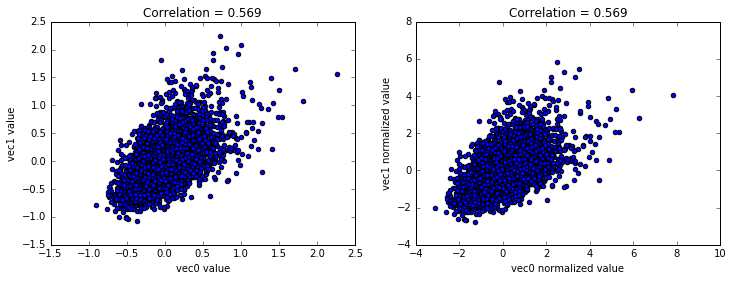

In [109]:
#... wait let's try it again

index0 = 0
index1 = 1

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
vec0 = data[:, index0]
vec1 = data[:, index1]
plt.scatter(vec0, vec1)
plt.xlabel('vec0 value')
plt.ylabel('vec1 value')
corrval = stats.pearsonr(vec0, vec1)[0]
plt.title('Correlation = %.3f' % corrval)

plt.subplot(1, 2, 2)
vec0_norm = normalize(vec0)
vec1_norm = normalize(vec1)
plt.scatter(vec0_norm, vec1_norm)
plt.xlabel('vec0 normalized value')
plt.ylabel('vec1 normalized value')
corrval = stats.pearsonr(vec0_norm, vec1_norm)[0]
plt.title('Correlation = %.3f' % corrval)

dotval = np.dot(vec0_norm, vec1_norm) / N
print('Our computed dot-product value is %.3f' % dotval)

Our computed dot-product value is -0.118


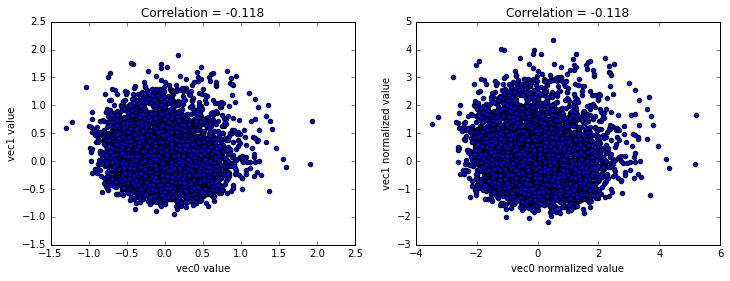

In [110]:
#... wait let's try it again

index0 = 12
index1 = 25

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
vec0 = data[:, index0]
vec1 = data[:, index1]
plt.scatter(vec0, vec1)
plt.xlabel('vec0 value')
plt.ylabel('vec1 value')
corrval = stats.pearsonr(vec0, vec1)[0]
plt.title('Correlation = %.3f' % corrval)

plt.subplot(1, 2, 2)
vec0_norm = normalize(vec0)
vec1_norm = normalize(vec1)
plt.scatter(vec0_norm, vec1_norm)
plt.xlabel('vec0 normalized value')
plt.ylabel('vec1 normalized value')
corrval = stats.pearsonr(vec0_norm, vec1_norm)[0]
plt.title('Correlation = %.3f' % corrval)

dotval = np.dot(vec0_norm, vec1_norm) / N
print('Our computed dot-product value is %.3f' % dotval)

PRINCIPLE:

$$\text{correlation}(\vec{v}_0, \vec{v}_1) = \frac{\mathbf{N}[\vec{v}_0] * \mathbf{N}[\vec{v}_1]}{N} = \text{cos(angle) between mean-subtracted vectors}$$

In [111]:
def correlation(v0, v1):
    N = len(v0)
    return np.dot(normalize(v0), normalize(v1)) / N    

In [112]:
#ok so our functions works!
correlation(data[:, 0], data[:, 1])

0.5691841125488282

In [113]:
#Now, let's get all the correlations available in this data between all the vectors. 

In [114]:
#how many of them are there? 
M = data.shape[1]
M
#296 of them

296

In [115]:
#this is a fancy way in python of doing nested for loops
#this uses a pattern in python called "list comprehensions"
corrs = [correlation(data[:, i], data[:, j]) for i in range(M) for j in range(i+1, M)]

In [116]:
"""
the equivalent of the above in actual for loops is

corrs = []
for i in range(M):
    for j in range(i+1, M):
        cval = correlation(data[:, i], data[:, j])
        corrs.append(cval)
        
but the so-called "list comprehension" is a little faster        

""";


In [117]:
#how many correlations have we taken?
len(corrs)

43660

In [501]:
#well, it's one for each unique pair of vectors, so that's:
M * (M-1) / 2
#exactly!

43660

In [502]:
plt.hist?

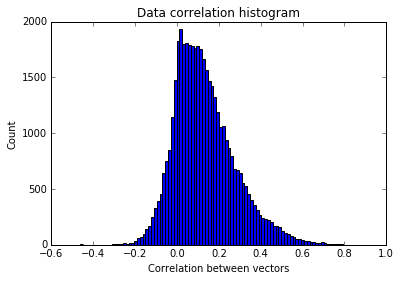

In [503]:
plt.hist(corrs, bins = 100);
plt.xlabel('Correlation between vectors')
plt.ylabel('Count')
plt.title('Data correlation histogram')
#It sure looks like it's very non-random ... 
#.... but how would we really know? 

In [504]:
#We need to create mock random data and compare. 

#this creates a set of random gaussian vectors of the proper size
#(the mean is 0 and variance is 1, but doesn't matter though because correlation wipes that out)
random_vecs = np.random.normal(size=(N, M))

#now lets compute the correlations between random vectors
random_corrs = [correlation(random_vecs[:, i], random_vecs[:, j]) for i in range(M) for j in range(i+1, M)]

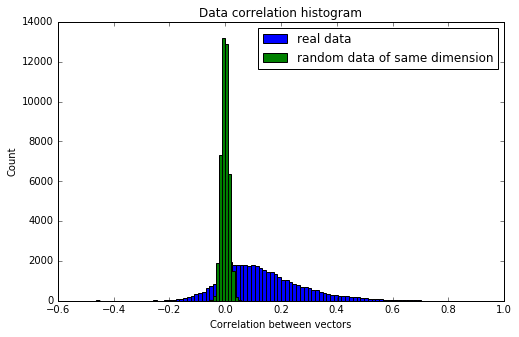

In [505]:
#now let's compare the random to the real data

plt.figure(figsize=(8, 5))
plt.hist(corrs, bins=100);
plt.hist(random_corrs, bins=10);
plt.xlabel('Correlation between vectors')
plt.ylabel('Count')
plt.title('Data correlation histogram')
plt.legend(['real data', 'random data of same dimension'])

#OBVIOUSLY different distributions.  could do stats if you want but not really necessary ... 

In [506]:
#Actually -- what happens as vectors get longer? 
#What should you expect about the correlations?
long_random_vecs = np.random.normal(size=(20000, M))
long_random_corrs = [correlation(long_random_vecs[:, i], long_random_vecs[:, j]) for i in range(M) for j in range(i+1, M)]

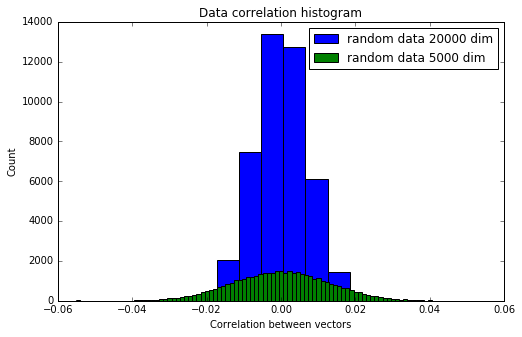

In [507]:
plt.figure(figsize=(8, 5))
plt.hist(long_random_corrs);
plt.hist(random_corrs, bins=100);
plt.xlabel('Correlation between vectors')
plt.ylabel('Count')
plt.title('Data correlation histogram')
plt.legend(['random data 20000 dim', 'random data 5000 dim'])


PRINCIPLE: correlation between random vectors decreases to 0 as vector length increases. 

Thus, in higher-dimensional spaces the angle between any two vectors is typically 0. 

## Correlation matrices 

What we really want to do is look at correlations in a matrix form:

$$M[i, j] = \text{correlation}(\vec{v}_i, \vec{v}_j).$$

This is a *symmetric* matrix; that is:

$$M[i, j] = \text{correlation}(\vec{v}_i, \vec{v}_j) = \text{correlation}(\vec{v}_j, \vec{v}_i) = M[j, i].$$

In [122]:
#the computation of correlations above is really slow
#while we compute our correlation matrix, let's measure how slow it is. 
import time

In [123]:
t0 = time.time()
corrs_matrix = np.array([[correlation(data[:, i], data[:, j]) for j in range(M)] for i in range(M) ])
t1 = time.time()
print('Elapsed time = %.3f(s)' % (t1 - t0))

Elapsed time = 14.944(s)


In [124]:
##
corrs_matrix.shape

(296, 296)

In [125]:
"""
By the way, the statement using "list comprehensions":

   corrs_matrix = np.array([[correlation(data[:, i], data[:, j]) for j in range(M)] for i in range(M) ])

is actually equivalent to the following one using nested for loops:

corrs_matrix = []
for i in range(M):
    cvec = []
    for j in range(i+1, M):
        cval = correlation(data[:, i], data[:, j])
        cvec.append(cval)
    corrs_matrix.append(cvec)
corrs_matrix = np.array(corrs_matrix)  #making it an actual array

""";

In [126]:
#There's a more efficient way -- use the built-in mechanism
t0 = time.time()
corrs_mat = np.corrcoef(data.T)
t1 = time.time()
print('Elapsed time = %.3f(s)' % (t1 - t0))
#ok, much better

Elapsed time = 0.022(s)


In [127]:
##ok the shape checks out
corrs_mat.shape

(296, 296)

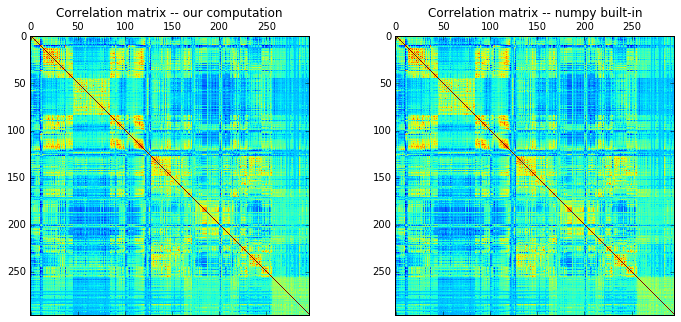

In [513]:
#let's look at our correlation matrices
plt.figure(figsize=(12, 5))
ax = plt.subplot(1, 2, 1)
ax.matshow(corrs_matrix)
plt.title('Correlation matrix -- our computation')
ax = plt.subplot(1, 2, 2)
ax.matshow(corrs_mat)
plt.title('Correlation matrix -- numpy built-in')